## NBA GM Signings Analysis

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import requests
import time
import json
from bs4 import BeautifulSoup

In [44]:
pd.set_option('display.max_columns', None)

In [4]:
years = list(range(2022,2025))

### Scraping from Basketball Reference

In [5]:
win_shares_url = 'https://www.basketball-reference.com/leagues/NBA_{}_advanced.html'

In [7]:
for year in years:
    url = win_shares_url.format(year)
    data = requests.get(url)
    
    with open("C:/Users/kevin/Jupyter Notebook Projects/win shares stats/{}.html".format(year), "w+", encoding='utf-8') as f:
        f.write(data.text)

Testing with just 2024 to see how the data looks.

In [8]:
with open("C:/Users/kevin/Jupyter Notebook Projects/win shares stats/2024.html", encoding='utf-8') as f:
    page = f.read()
    
soup = BeautifulSoup(page, "html.parser")

winsharesstats2024 = soup.find(id="advanced_stats")

winshares_2024 = pd.read_html(str(winsharesstats2024))[0]
winshares_2024["Year"] = year

winshares_2024

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP,Year
0,1,Precious Achiuwa,PF-C,24,TOT,74,1624,14.6,.545,.207,...,1.2,2.2,3.4,.102,NaN,-1.7,0.3,-1.4,0.2,2024
1,1,Precious Achiuwa,C,24,TOR,25,437,15.0,.512,.276,...,0.0,0.4,0.4,.048,NaN,-1.4,-0.2,-1.6,0.0,2024
2,1,Precious Achiuwa,PF,24,NYK,49,1187,14.5,.564,.167,...,1.2,1.8,3.0,.122,NaN,-1.9,0.5,-1.4,0.2,2024
3,2,Bam Adebayo,C,26,MIA,71,2416,19.8,.576,.041,...,2.9,4.3,7.2,.144,NaN,0.8,1.7,2.4,2.7,2024
4,3,Ochai Agbaji,SG,23,TOT,78,1641,7.7,.497,.487,...,-0.5,0.6,0.1,.002,NaN,-3.5,-0.9,-4.4,-1.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,568,Thaddeus Young,PF,35,PHO,10,89,15.1,.515,.048,...,0.1,0.1,0.3,.137,NaN,-1.5,0.6,-0.9,0.0,2024
759,569,Trae Young,PG,25,ATL,54,1942,20.3,.585,.465,...,4.0,0.6,4.6,.114,NaN,4.9,-2.3,2.6,2.2,2024
760,570,Omer Yurtseven,C,25,UTA,48,545,15.0,.565,.130,...,0.3,0.4,0.7,.062,NaN,-1.6,-1.5,-3.0,-0.1,2024
761,571,Cody Zeller,C,31,NOP,43,320,12.8,.483,.048,...,0.4,0.4,0.8,.124,NaN,-2.9,0.3,-2.6,0.0,2024


In [9]:
winshares_2024.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'Unnamed: 19', 'OWS', 'DWS', 'WS', 'WS/48', 'Unnamed: 24', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'Year'],
      dtype='object')

In [10]:
drop_cols = ['Rk','Unnamed: 24', 'Unnamed: 19']
winshares_2024 = winshares_2024.drop(drop_cols, axis = 1)

In [11]:
winshares_2024

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
0,Precious Achiuwa,PF-C,24,TOT,74,1624,14.6,.545,.207,.239,...,15.9,1.2,2.2,3.4,.102,-1.7,0.3,-1.4,0.2,2024
1,Precious Achiuwa,C,24,TOR,25,437,15.0,.512,.276,.247,...,21.2,0.0,0.4,0.4,.048,-1.4,-0.2,-1.6,0.0,2024
2,Precious Achiuwa,PF,24,NYK,49,1187,14.5,.564,.167,.234,...,14.0,1.2,1.8,3.0,.122,-1.9,0.5,-1.4,0.2,2024
3,Bam Adebayo,C,26,MIA,71,2416,19.8,.576,.041,.381,...,24.9,2.9,4.3,7.2,.144,0.8,1.7,2.4,2.7,2024
4,Ochai Agbaji,SG,23,TOT,78,1641,7.7,.497,.487,.129,...,13.4,-0.5,0.6,0.1,.002,-3.5,-0.9,-4.4,-1.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,Thaddeus Young,PF,35,PHO,10,89,15.1,.515,.048,.143,...,12.8,0.1,0.1,0.3,.137,-1.5,0.6,-0.9,0.0,2024
759,Trae Young,PG,25,ATL,54,1942,20.3,.585,.465,.404,...,30.5,4.0,0.6,4.6,.114,4.9,-2.3,2.6,2.2,2024
760,Omer Yurtseven,C,25,UTA,48,545,15.0,.565,.130,.152,...,17.9,0.3,0.4,0.7,.062,-1.6,-1.5,-3.0,-0.1,2024
761,Cody Zeller,C,31,NOP,43,320,12.8,.483,.048,.613,...,12.9,0.4,0.4,0.8,.124,-2.9,0.3,-2.6,0.0,2024


Need to clean out duplicate rows of players. Instead of keeping the TOT row, I will want to keep the row corresponding to the acquiring team.

### Loop for Yearly Stats

In [16]:
dfs = []
for year in years:
    file_path = f"C:/Users/kevin/Jupyter Notebook Projects/win shares stats/{year}.html"
    
    with open(file_path, encoding='utf-8') as f:
        page = f.read()
    soup = BeautifulSoup(page, "html.parser")
    winsharesstats = soup.find(id="advanced_stats")
    winshares = pd.read_html(str(winsharesstats))[0]
    winshares["Year"] = year
    
    drop_cols = ['Rk','Unnamed: 24', 'Unnamed: 19']
    winshares = winshares.drop(drop_cols, axis = 1)
    
    dfs.append(winshares)

In [17]:
winshares_df = pd.concat(dfs)

In [19]:
winshares_df[winshares_df['Player'] == 'Precious Achiuwa']

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
0,Precious Achiuwa,C,22,TOR,73,1725,12.7,.503,.259,.217,...,18.5,0.4,2.1,2.5,.070,-2.0,-0.6,-2.6,-0.2,2022
0,Precious Achiuwa,C,23,TOR,55,1140,15.2,.554,.267,.307,...,19.4,0.8,1.4,2.2,.093,-1.4,-0.8,-2.3,-0.1,2023
0,Precious Achiuwa,PF-C,24,TOT,74,1624,14.6,.545,.207,.239,...,15.9,1.2,2.2,3.4,.102,-1.7,0.3,-1.4,0.2,2024
1,Precious Achiuwa,C,24,TOR,25,437,15.0,.512,.276,.247,...,21.2,0.0,0.4,0.4,.048,-1.4,-0.2,-1.6,0.0,2024
2,Precious Achiuwa,PF,24,NYK,49,1187,14.5,.564,.167,.234,...,14.0,1.2,1.8,3.0,.122,-1.9,0.5,-1.4,0.2,2024


In [20]:
winshares_df.to_csv('C:/Users/kevin/Downloads/win shares stats 2022-2024.csv', index=False)

In [21]:
winshares_df = pd.read_csv('C:/Users/kevin/Downloads/win shares stats 2022-2024.csv')

### Combine with Google Sheet Data

In [24]:
signings_df = pd.read_csv('C:/Users/kevin/Downloads/NBA GM Transaction Dataset - 5 Teams Signing Data.csv')

In [25]:
signings_df

,Season,Team Acquiring,Acquired Player,Team Losing,Acquisition Type,Acquiring GM,Losing GM,Year 2,Acquired Player BPM/WARP Year 1,Acquired Player BPM/WARP Year 2,AAV,One Year?
0,2022,PHI,Andre Drummond,LAL,Signing,Daryl Morey,Rob Pelinka,2023,NaN,NaN,2.40,Yes
1,2022,LAL,Carmelo Anthony,POR,Signing,Rob Pelinka,Joe Cronin,2023,NaN,NaN,2.60,Yes
2,2022,LAL,Trevor Ariza,MIA,Signing,Rob Pelinka,Andy Elisburg,2023,NaN,NaN,2.60,Yes
3,2022,LAL,Kent Bazemore,GSW,Signing,Rob Pelinka,Bob Myers,2023,NaN,NaN,2.40,Yes
4,2022,LAL,Wayne Ellington,DET,Signing,Rob Pelinka,Troy Weaver,2023,NaN,NaN,2.60,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
74,2024,LAL,Christian Wood,DAL,Signing,Rob Pelinka,Nico Harrison,2025,NaN,NaN,2.85,No
75,2024,PHI,Danny Green,CLE,Signing,Daryl Morey,Koby Altman,2025,NaN,NaN,1.90,Yes
76,2024,BOS,Lamar Stevens,CLE,Signing,Brad Stevens,Koby Altman,2025,NaN,NaN,1.90,Yes
77,2024,PHI,Kelly Oubre,CHO,Signing,Daryl Morey,Mitch Kupchak,2025,NaN,NaN,1.90,Yes


### Merging Data

In [26]:
merged_df = pd.merge(signings_df, winshares_df[['Player', 'Year', 'Tm', 'WS']], 
                     left_on=['Acquired Player', 'Season', 'Team Acquiring'], 
                     right_on=['Player', 'Year', 'Tm'], 
                     how='left')

In [28]:
# Assign the WS values to Acquired Player BPM/WARP Year 1 column
signings_df['Acquired Player BPM/WARP Year 1'] = merged_df['WS']

In [33]:
signings_df[signings_df['Acquired Player'] == 'Lamar Stevens']

,Season,Team Acquiring,Acquired Player,Team Losing,Acquisition Type,Acquiring GM,Losing GM,Year 2,Acquired Player BPM/WARP Year 1,Acquired Player BPM/WARP Year 2,AAV,One Year?
76,2024,BOS,Lamar Stevens,CLE,Signing,Brad Stevens,Koby Altman,2025,0.2,NaN,1.9,Yes


In [34]:
winshares_df[winshares_df['Player'] == 'Lamar Stevens']

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
726,Lamar Stevens,PF,24,CLE,63,1015,11.3,.544,.204,.235,...,17.1,0.4,1.2,1.6,.078,-3.2,0.3,-2.9,-0.2,2022
1447,Lamar Stevens,SF,25,CLE,62,1120,9.5,.524,.330,.198,...,13.6,0.3,1.6,1.9,.080,-3.0,0.2,-2.8,-0.2,2023
2192,Lamar Stevens,PF,26,TOT,38,559,14.6,.516,.192,.225,...,22.2,0.0,0.8,0.8,.068,-2.2,-0.1,-2.2,0.0,2024
2193,Lamar Stevens,PF,26,BOS,19,122,14.5,.532,.178,.244,...,21.0,0.0,0.2,0.2,.093,-2.9,0.9,-2.0,0.0,2024
2194,Lamar Stevens,PF,26,MEM,19,437,14.7,.512,.195,.221,...,22.5,0.0,0.6,0.6,.061,-2.0,-0.3,-2.3,0.0,2024


In [35]:
merged_df_year2 = pd.merge(signings_df, winshares_df[['Player', 'Year', 'Tm', 'WS']], 
                     left_on=['Acquired Player', 'Year 2', 'Team Acquiring'], 
                     right_on=['Player', 'Year', 'Tm'], 
                     how='left')

In [36]:
signings_df['Acquired Player BPM/WARP Year 2'] = merged_df_year2['WS']

In [37]:
signings_df.isna().sum()

Season                              0
Team Acquiring                      0
Acquired Player                     0
Team Losing                         0
Acquisition Type                    0
Acquiring GM                        0
Losing GM                           3
Year 2                              0
Acquired Player BPM/WARP Year 1    14
Acquired Player BPM/WARP Year 2    67
AAV                                 0
One Year?                           0
dtype: int64

From here it looks most players (67/79) in this dataset did not stay on the same team in year 2 after the acquisition.

In [39]:
signings_df[signings_df['Acquired Player BPM/WARP Year 2'].notna()]

,Season,Team Acquiring,Acquired Player,Team Losing,Acquisition Type,Acquiring GM,Losing GM,Year 2,Acquired Player BPM/WARP Year 1,Acquired Player BPM/WARP Year 2,AAV,One Year?
5,2022,MIL,George Hill,PHI,Signing,Jon Horst,Daryl Morey,2023,2.3,1.4,4.00,No
10,2022,PHI,Georges Niang,UTA,Signing,Daryl Morey,Justin Zanik,2023,2.8,2.5,3.35,No
11,2022,LAL,Kendrick Nunn,MIA,Signing,Rob Pelinka,Andy Elisburg,2023,NaN,-0.2,5.10,No
14,2022,CHI,Alex Caruso,LAL,Signing,Marc Eversley,Rob Pelinka,2023,2.0,3.6,9.25,No
17,2022,CHI,Tony Bradley,OKC,Signing,Marc Eversley,Sam Presti,2023,1.3,0.2,1.90,No
18,2022,DEN,Jeff Green,BRK,Signing,Calvin Booth,Sean Marks,2023,3.9,1.7,5.00,No
21,2022,NYK,Evan Fournier,BOS,Signing,Scott Perry,Brad Stevens,2023,3.7,0.1,18.25,No
27,2022,LAL,Austin Reaves,Undrafted,Signing,Rob Pelinka,NaN,2023,2.9,5.4,0.60,Yes
34,2023,SAC,Malik Monk,LAL,Signing,Monte McNair,Rob Pelinka,2024,3.2,3.5,9.70,No
35,2023,PHI,P.J. Tucker,MIA,Signing,Daryl Morey,Andy Elisburg,2024,2.5,0.1,11.07,No


In [40]:
signings_df[signings_df['Acquired Player'] == 'Malik Monk']

,Season,Team Acquiring,Acquired Player,Team Losing,Acquisition Type,Acquiring GM,Losing GM,Year 2,Acquired Player BPM/WARP Year 1,Acquired Player BPM/WARP Year 2,AAV,One Year?
8,2022,LAL,Malik Monk,CHO,Signing,Rob Pelinka,Mitch Kupchak,2023,3.6,NaN,1.8,Yes
34,2023,SAC,Malik Monk,LAL,Signing,Monte McNair,Rob Pelinka,2024,3.2,3.5,9.7,No


In [41]:
winshares_df[winshares_df['Player'] == 'Malik Monk']

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year
536,Malik Monk,SG,23,LAL,76,2139,14.4,.597,.535,.142,...,20.1,2.3,1.4,3.6,.081,0.5,-1.0,-0.5,0.8,2022
1290,Malik Monk,SG,24,SAC,77,1719,16.6,.587,.500,.260,...,25.8,2.1,1.2,3.2,.091,1.6,-1.4,0.3,1.0,2023
2021,Malik Monk,SG,25,SAC,72,1872,16.0,.564,.474,.230,...,25.9,1.9,1.6,3.5,.090,1.5,-1.0,0.6,1.2,2024


### Aggregation and Visualization

In [51]:
teams = ['BOS', 'PHI', 'NYK', 'OKC', 'LAL']

In [54]:
# Filter the DataFrame to only include the specified teams
filtered_df = signings_df[signings_df['Team Acquiring'].isin(teams)]

# Convert 'AAV' and 'Acquired Player BPM/WARP Year 1' to numeric, coercing errors to NaN
filtered_df['AAV'] = pd.to_numeric(filtered_df['AAV'], errors='coerce')
filtered_df['Acquired Player BPM/WARP Year 1'] = pd.to_numeric(filtered_df['Acquired Player BPM/WARP Year 1'], errors='coerce')

# Group by 'Team Acquiring' and calculate the sum of 'AAV' and 'Acquired Player BPM/WARP Year 1'
grouped = filtered_df.groupby('Team Acquiring').agg({
    'AAV': 'sum',
    'Acquired Player BPM/WARP Year 1': 'sum'
})

# Calculate the ratio of AAV to Acquired Player BPM/WARP Year 1
grouped['AAV_to_WS'] = grouped['AAV'] / grouped['Acquired Player BPM/WARP Year 1']

# Reset index for easier plotting
grouped = grouped.reset_index()

C:\Users\kevin\AppData\Local\Temp\ipykernel_24444\2563377638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['AAV'] = pd.to_numeric(filtered_df['AAV'], errors='coerce')
C:\Users\kevin\AppData\Local\Temp\ipykernel_24444\2563377638.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Acquired Player BPM/WARP Year 1'] = pd.to_numeric(filtered_df['Acquired Player BPM/WARP Year 1'], errors='coerce')


In [55]:
grouped

,Team Acquiring,AAV,Acquired Player BPM/WARP Year 1,AAV_to_BPM_WARP
0,BOS,29.90,4.2,7.119048
1,LAL,69.00,28.4,2.429577
2,NYK,27.20,5.5,4.945455
3,OKC,2.00,3.8,0.526316
4,PHI,31.22,14.1,2.214184


In [56]:
signings_df[signings_df['Team Acquiring'] == 'NYK']
# Just verifying that the grouped data looks right

,Season,Team Acquiring,Acquired Player,Team Losing,Acquisition Type,Acquiring GM,Losing GM,Year 2,Acquired Player BPM/WARP Year 1,Acquired Player BPM/WARP Year 2,AAV,One Year?
16,2022,NYK,Kemba Walker,BOS,Signing,Scott Perry,Brad Stevens,2023,1.8,NaN,8.95,No
21,2022,NYK,Evan Fournier,BOS,Signing,Scott Perry,Brad Stevens,2023,3.7,0.1,18.25,No


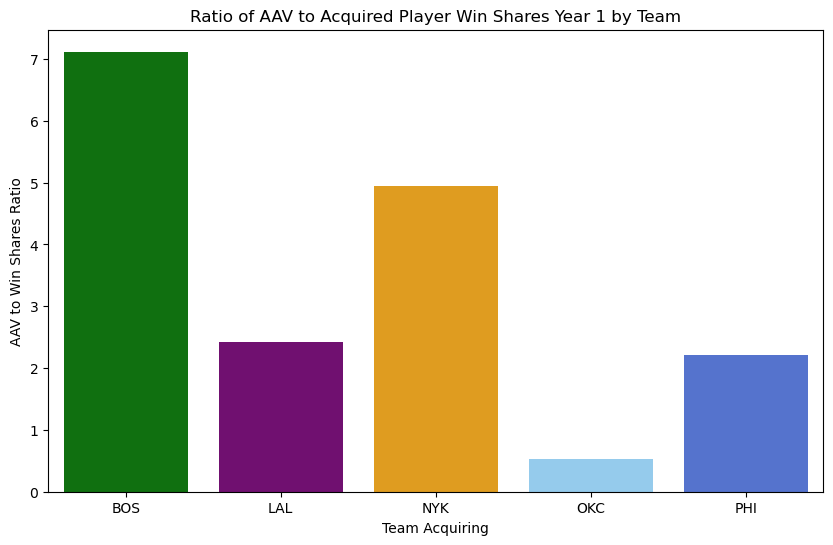

In [58]:
custom_palette = {
    'BOS': 'green',
    'NYK': 'orange',
    'PHI': 'royalblue',
    'OKC': 'lightskyblue',  # baby blue
    'LAL': 'purple'
}

# Create the bar plot using seaborn or matplotlib
plt.figure(figsize=(10, 6))

# Using seaborn to create the bar chart
sns.barplot(x='Team Acquiring', y='AAV_to_BPM_WARP', data=grouped, palette=custom_palette)

# Add labels and title
plt.title('Ratio of AAV to Acquired Player Win Shares Year 1 by Team')
plt.xlabel('Team Acquiring')
plt.ylabel('AAV to Win Shares Ratio')

# Show the plot
plt.show()

In [59]:
# Filter the DataFrame to only include the specified teams
filtered_df = signings_df[signings_df['Team Losing'].isin(teams)]

# Convert 'AAV' and 'Acquired Player BPM/WARP Year 1' to numeric, coercing errors to NaN
filtered_df['AAV'] = pd.to_numeric(filtered_df['AAV'], errors='coerce')
filtered_df['Acquired Player BPM/WARP Year 1'] = pd.to_numeric(filtered_df['Acquired Player BPM/WARP Year 1'], errors='coerce')

# Group by 'Team Acquiring' and calculate the sum of 'AAV' and 'Acquired Player BPM/WARP Year 1'
grouped_against = filtered_df.groupby('Team Losing').agg({
    'AAV': 'sum',
    'Acquired Player BPM/WARP Year 1': 'sum'
})

# Calculate the ratio of AAV to Acquired Player BPM/WARP Year 1
grouped_against['AAV_to_WS'] = grouped_against['AAV'] / grouped_against['Acquired Player BPM/WARP Year 1']

# Reset index for easier plotting
grouped_against = grouped_against.reset_index()

C:\Users\kevin\AppData\Local\Temp\ipykernel_24444\3009957051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['AAV'] = pd.to_numeric(filtered_df['AAV'], errors='coerce')
C:\Users\kevin\AppData\Local\Temp\ipykernel_24444\3009957051.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Acquired Player BPM/WARP Year 1'] = pd.to_numeric(filtered_df['Acquired Player BPM/WARP Year 1'], errors='coerce')


In [60]:
grouped_against

,Team Losing,AAV,Acquired Player BPM/WARP Year 1,AAV_to_WS
0,BOS,44.25,6.9,6.413043
1,LAL,54.15,15.5,3.493548
2,OKC,6.80,1.2,5.666667
3,PHI,29.82,13.0,2.293846


In [62]:
signings_df[signings_df['Team Losing'] == 'BOS']

,Season,Team Acquiring,Acquired Player,Team Losing,Acquisition Type,Acquiring GM,Losing GM,Year 2,Acquired Player BPM/WARP Year 1,Acquired Player BPM/WARP Year 2,AAV,One Year?
12,2022,MIL,Semi Ojeleye,BOS,Signing,Jon Horst,Brad Stevens,2023,0.1,NaN,1.90,Yes
16,2022,NYK,Kemba Walker,BOS,Signing,Scott Perry,Brad Stevens,2023,1.8,NaN,8.95,No
21,2022,NYK,Evan Fournier,BOS,Signing,Scott Perry,Brad Stevens,2023,3.7,0.1,18.25,No
47,2023,LAL,Matt Ryan,BOS,Signing,Rob Pelinka,Brad Stevens,2024,0.0,NaN,1.90,Yes
68,2024,DAL,Grant Williams,BOS,Signing,Nico Harrison,Brad Stevens,2025,1.3,NaN,13.25,No


In [68]:
grouped

,Team Acquiring,AAV,Acquired Player BPM/WARP Year 1,AAV_to_BPM_WARP
0,BOS,29.90,4.2,7.119048
1,LAL,69.00,28.4,2.429577
2,NYK,27.20,5.5,4.945455
3,OKC,2.00,3.8,0.526316
4,PHI,31.22,14.1,2.214184


In [69]:
grouped_against

,Team Losing,AAV,Acquired Player BPM/WARP Year 1,AAV_to_WS
0,BOS,44.25,6.9,6.413043
1,LAL,54.15,15.5,3.493548
2,OKC,6.80,1.2,5.666667
3,PHI,29.82,13.0,2.293846


In [74]:
# Merge the two DataFrames on 'Team Acquiring' and 'Team Losing'
grouped_difference = pd.merge(grouped, grouped_against, 
                              left_on='Team Acquiring', right_on='Team Losing', 
                              suffixes=('_acquired', '_losing'))

# Calculate the final ratio by dividing the AAV_to_WS of acquired over the AAV_to_WS of losing
grouped_difference['final_ratio'] = grouped_difference['AAV_to_WS'] / grouped_difference['AAV_to_BPM_WARP']

# Select only the relevant columns for the result
grouped_difference = grouped_difference[['Team Acquiring', 'final_ratio']]

In [75]:
grouped_difference

,Team Acquiring,final_ratio
0,BOS,0.900829
1,LAL,1.437924
2,OKC,10.766667
3,PHI,1.035978


In interpreting these values, above a ratio above 1 means that a team is more efficient with the players they bring in versus the players they lose.

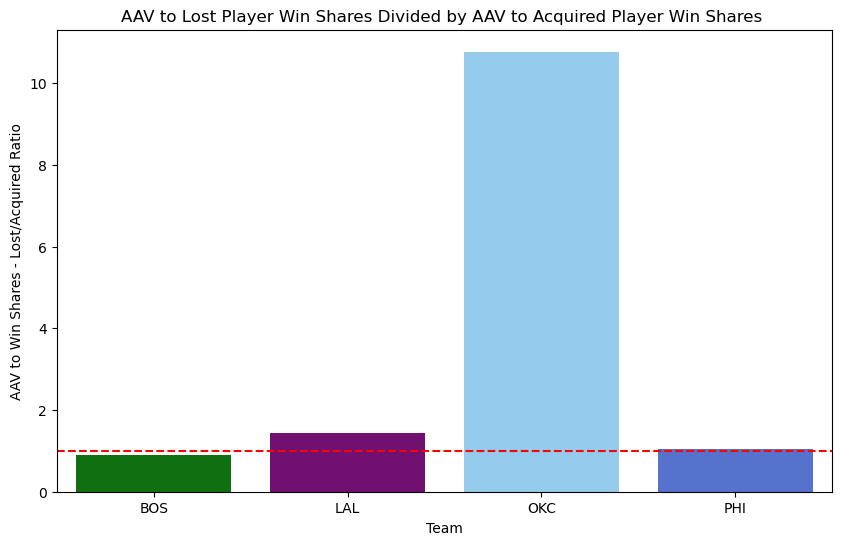

In [78]:
# Create the bar plot using seaborn or matplotlib
plt.figure(figsize=(10, 6))

# Using seaborn to create the bar chart
sns.barplot(x='Team Acquiring', y='final_ratio', data=grouped_difference, palette=custom_palette)

# Add a red horizontal line at y=1
plt.axhline(y=1, color='red', linestyle='--')

# Add labels and title
plt.title('AAV to Lost Player Win Shares Divided by AAV to Acquired Player Win Shares ')
plt.xlabel('Team')
plt.ylabel('AAV to Win Shares - Lost/Acquired Ratio')

# Show the plot
plt.show()